<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Final_Z_CovidDetectionClass3_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Train', 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Val', 
                                                batch_size=16, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory('/content/drive/MyDrive/CovidDataset/CovidDataset/Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

In [ ]:
r = model.fit(
    train, 
    epochs=25,
    validation_data=validation,
    validation_steps=50,
)

Epoch 1/25
262/262 [==============================] - 6258s 24s/step - loss: 0.5003 - accuracy: 0.7767 - val_loss: 0.3635 - val_accuracy: 0.8988
Epoch 2/25
262/262 [==============================] - 208s 795ms/step - loss: 0.3153 - accuracy: 0.8788 - val_loss: 0.4518 - val_accuracy: 0.8300
Epoch 3/25
262/262 [==============================] - 210s 802ms/step - loss: 0.2627 - accuracy: 0.9001 - val_loss: 0.3721 - val_accuracy: 0.8550
Epoch 4/25
262/262 [==============================] - 209s 798ms/step - loss: 0.2225 - accuracy: 0.9140 - val_loss: 0.3550 - val_accuracy: 0.8975
Epoch 5/25
262/262 [==============================] - 209s 797ms/step - loss: 0.1857 - accuracy: 0.9299 - val_loss: 0.2961 - val_accuracy: 0.9025
Epoch 6/25
262/262 [==============================] - 209s 796ms/step - loss: 0.1634 - accuracy: 0.9388 - val_loss: 0.1656 - val_accuracy: 0.9400
Epoch 7/25
262/262 [==============================] - 210s 800ms/step - loss: 0.1616 - accuracy: 0.9367 - val_loss: 0.3748 - 

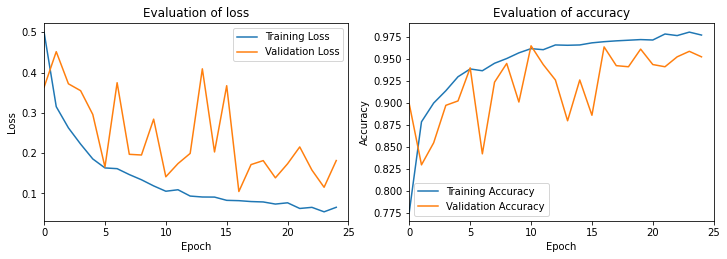

In [ ]:
plt.figure(figsize=(12, 8))
x=[0,5,10,15,20,25]
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss',scalex=True)
plt.plot(r.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,25)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,25)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("irnv2_curve3.png")


In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

# evaluation = model.evaluate(train)
# print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 1774s 636ms/step - loss: 0.2087 - accuracy: 0.9344
Test Accuracy: 93.44%


In [ ]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)

pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))


,0,1,2,accuracy,macro avg,weighted avg
precision,0.936898,0.891150,0.989679,0.937276,0.939242,0.939242
recall,0.941935,0.941935,0.927957,0.937276,0.937276,0.937276
f1-score,0.939410,0.915839,0.957825,0.937276,0.937691,0.937691
support,930.000000,930.000000,930.000000,0.937276,2790.000000,2790.000000


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[876  49   5]
 [ 50 876   4]
 [  9  58 863]]


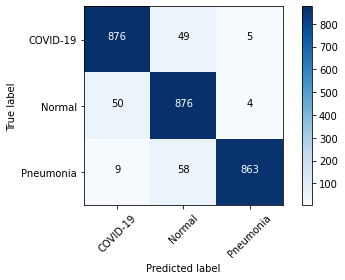

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID-19', 'Normal', 'Pneumonia'])
plt.savefig("IRNV2_CONFUTIONMATRIX3.png")


In [ ]:
model.save('irnv2_model_final_1.h5')